In [1]:
from __future__ import division
import os
import numpy as np 
import pandas as pd
from helpers import data_provider
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle as pcl
def write_to_file(newfile, run_info):
    with open(newfile,'wb') as outfile:
        pcl.dump(run_info,outfile)

def read_from_file(newfile):
    run_info = pcl.load(open(newfile,'r'))
    return run_info

In [3]:
%matplotlib inline
plt.style.use('classic')
plt.rc("figure", facecolor="white")


fig_width_pt = 469.755  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'text.fontsize': 10,
          'legend.fontsize': 10,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'text.usetex': True,
          'figure.figsize': fig_size}
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rcParams.update(params)


def plot_consumption(figure_name, which_house, data):
    plt.figure(1)
    plt.clf()
    plt.axes([0.125,0.2,0.95-0.125,0.95-0.2])
    plt.plot(data, color='b')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel('Consumption (kwh)')
    plt.title('House nr. '+str(which_house)+'Electricity Consumption')
    plt.savefig('figures/electricity_consumption/'+figure_name+'_'+str(which_house)+'.pdf')
    plt.savefig('figures/electricity_consumption/'+figure_name+'_'+str(which_house)+'.eps')
    plt.show()

def insta_plot(vals):
    plt.figure(figsize=(12,6))
    plt.plot(vals, color='b')
    plt.xticks(rotation=45)
    plt.title('Unregistered Electricity Consumption')
    plt.xlabel('Time')
    plt.ylabel('Consumption (kwh)')
    plt.grid(True)
    plt.show()

C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\matplotlib\__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Plotting and saving data figures

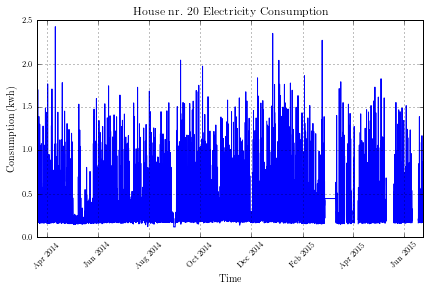

In [3]:
#Plot and save consumption figures for each house
houses=[1,2,4,5,6,7,8,9,10,12,13,15,16,17,18,19,20]
for house_nr in houses:
    data = data_provider.load_aggregate(house_nr)
    plot_consumption(figure_name='electricity_consumption',which_house=house_nr,data=data.Aggregate)

In [9]:
# Save important summary statistics for each house
d = {}
houses=[1,2,4,5,6,7,8,9,10,12,13,15,16,17,18,19,20]
for house_nr in houses:
    data = data_provider.load_aggregate(house_nr)
    key = 'house_'+str(house_nr)
    d[key] = data.describe()
    
write_to_file('summary_statistics.txt',d)

## Boxplot for spotting outliers

In [28]:
df = pd.DataFrame()
for house_nr in houses:
    data = data_provider.load_aggregate(house_nr)
    key = 'house_'+str(house_nr)
    df = pd.concat([df,data], ignore_index=True, axis=1)
names= ['House '+str(house) for house in houses]
df.columns = names

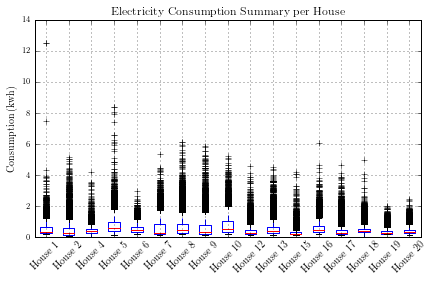

In [36]:
plt.figure(1)
plt.clf()
plt.axes([0.125,0.2,0.95-0.125,0.95-0.2])
_=df.boxplot()
plt.xticks(rotation=45)
plt.ylabel('Consumption (kwh)')
plt.title('Electricity Consumption Summary per House')
plt.savefig('figures/houses_box.eps')
plt.savefig('figures/houses_box.pdf')

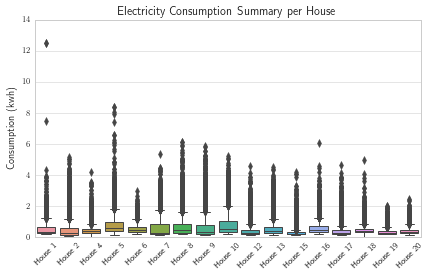

In [40]:
plt.figure(1)
plt.clf()
plt.axes([0.125,0.2,0.95-0.125,0.95-0.2])
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.ylabel('Consumption (kwh)')
plt.title('Electricity Consumption Summary per House')
plt.savefig('figures/test_houses_box.eps')
plt.savefig('figures/test_houses_box.pdf')

## Cleaning Extreme Values

In [4]:
data = pd.read_csv('houses.csv',parse_dates=['Time'],index_col='Time')

In [5]:
houses=[1,2,4,5,6,7,8,9,10,12,13,15,16,17,18,19,20]
names= ['House '+str(house) for house in houses]
data.columns = names

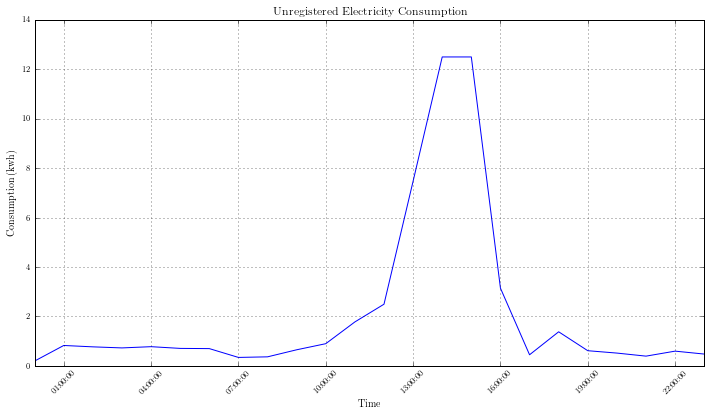

In [22]:
insta_plot(data.House_1['2015-02-08'])

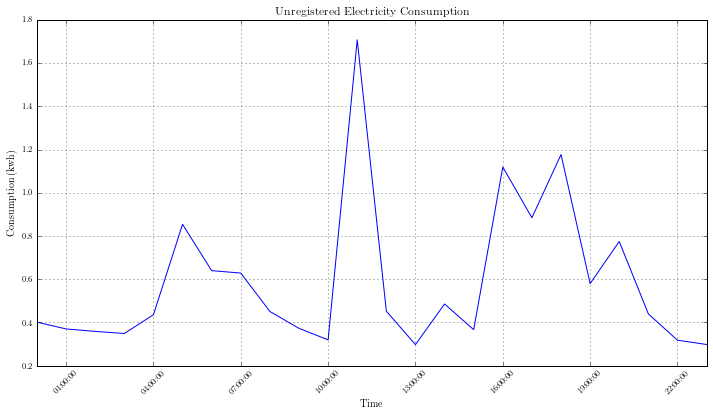

In [54]:
insta_plot(data.House_16['2014-05-06'])

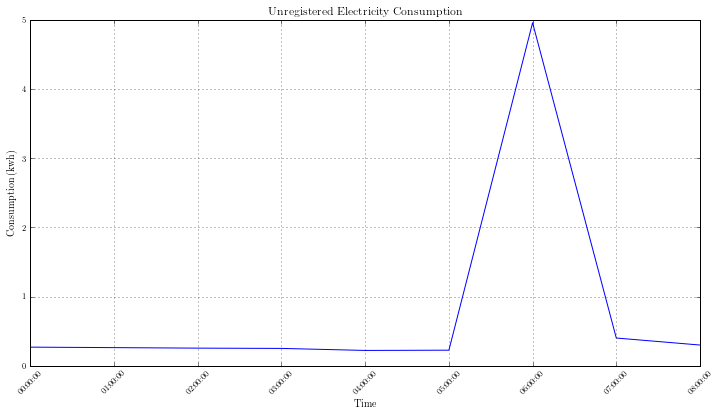

In [60]:
insta_plot(data.House_18['2015-03-22'])

In [46]:
data.set_value('2015-02-08 13:00:00', 'House_1', 0.776 + abs(np.random.randn()))
data.set_value('2015-02-08 14:00:00', 'House_1', 0.776 + abs(np.random.randn()))
data.set_value('2015-02-08 15:00:00', 'House_1', 0.776 + abs(np.random.randn()))
data.set_value('2015-02-08 16:00:00', 'House_1', 0.776 + abs(np.random.randn()))

,House_1,House_2,House_4,House_5,House_6,House_7,House_8,House_9,House_10,House_12,House_13,House_15,House_16,House_17,House_18,House_19,House_20
Time,,,,,,,,,,,,,,,,,
2013-09-17 22:00:00,NaN,0.277643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-17 23:00:00,NaN,0.093307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 00:00:00,NaN,0.093647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 01:00:00,NaN,0.063625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 02:00:00,NaN,0.091045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 03:00:00,NaN,0.094706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 04:00:00,NaN,0.065492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 05:00:00,NaN,0.091565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 06:00:00,NaN,0.818960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
data.set_value('2014-05-06 11:00:00', 'House_16', 0.477 + abs(np.random.randn()))

,House_1,House_2,House_4,House_5,House_6,House_7,House_8,House_9,House_10,House_12,House_13,House_15,House_16,House_17,House_18,House_19,House_20
Time,,,,,,,,,,,,,,,,,
2013-09-17 22:00:00,NaN,0.277643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-17 23:00:00,NaN,0.093307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 00:00:00,NaN,0.093647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 01:00:00,NaN,0.063625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 02:00:00,NaN,0.091045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 03:00:00,NaN,0.094706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 04:00:00,NaN,0.065492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 05:00:00,NaN,0.091565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 06:00:00,NaN,0.818960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
data.set_value('2015-03-22 06:00:00', 'House_18', 0.35)

,House_1,House_2,House_4,House_5,House_6,House_7,House_8,House_9,House_10,House_12,House_13,House_15,House_16,House_17,House_18,House_19,House_20
Time,,,,,,,,,,,,,,,,,
2013-09-17 22:00:00,NaN,0.277643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-17 23:00:00,NaN,0.093307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 00:00:00,NaN,0.093647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 01:00:00,NaN,0.063625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 02:00:00,NaN,0.091045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 03:00:00,NaN,0.094706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 04:00:00,NaN,0.065492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 05:00:00,NaN,0.091565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18 06:00:00,NaN,0.818960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = pd.read_csv('houses_clean.csv',parse_dates=['Time'],index_col='Time')
houses=[1,2,4,5,6,7,8,9,10,12,13,15,16,17,18,19,20]
names= ['House '+str(house) for house in houses]
df.columns = names

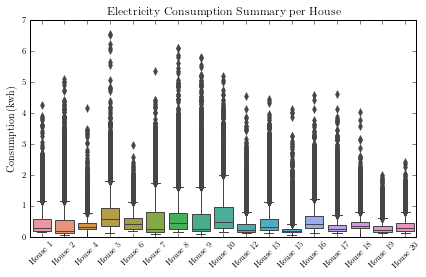

In [5]:
plt.figure(1)
plt.clf()
plt.axes([0.125,0.2,0.95-0.125,0.95-0.2])
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.ylabel('Consumption (kwh)')
plt.title('Electricity Consumption Summary per House')
plt.savefig('figures/sns_houses_clean_box.eps')
plt.savefig('figures/sns_houses_clean_box.pdf')

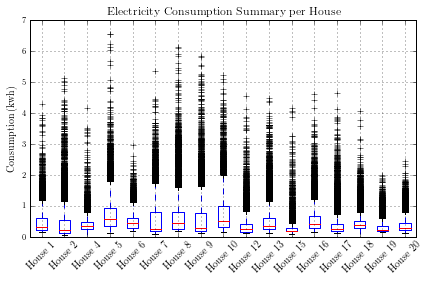

In [6]:
plt.figure(1)
plt.clf()
plt.axes([0.125,0.2,0.95-0.125,0.95-0.2])
_=df.boxplot()
plt.xticks(rotation=45)
plt.ylabel('Consumption (kwh)')
plt.title('Electricity Consumption Summary per House')
plt.savefig('figures/houses_clean_box.eps')
plt.savefig('figures/houses_clean_box.pdf')

In [11]:
df.describe()

,House 1,House 2,House 4,House 5,House 6,House 7,House 8,House 9,House 10,House 12,House 13,House 15,House 16,House 17,House 18,House 19,House 20
count,13520.000000,11354.000000,13584.000000,14535.000000,11829.000000,12929.000000,12003.000000,11581.000000,12949.000000,10985.000000,9436.000000,12130.000000,11155.000000,10632.000000,10042.000000,10644.000000,10412.000000
mean,0.475820,0.458801,0.379930,0.742775,0.480945,0.561838,0.683744,0.576275,0.760164,0.371035,0.560799,0.255822,0.558509,0.407223,0.447657,0.291412,0.376308
std,0.403045,0.579903,0.236769,0.564555,0.260507,0.584454,0.689319,0.652033,0.667145,0.365521,0.577496,0.228375,0.423730,0.450664,0.303978,0.199979,0.258193
min,0.152000,0.052667,0.000000,0.127994,0.177595,0.092454,0.175323,0.107652,0.152500,0.123012,0.119870,0.072198,0.134351,0.115270,0.000000,0.131496,0.117722
25%,0.206211,0.124262,0.242241,0.352525,0.273069,0.169588,0.245537,0.178300,0.292460,0.156293,0.230378,0.163121,0.286835,0.179352,0.281819,0.166761,0.203967
50%,0.302760,0.204322,0.330292,0.565768,0.426965,0.256397,0.441163,0.272867,0.493998,0.226987,0.336059,0.181815,0.419901,0.243439,0.361262,0.218569,0.286349
75%,0.591032,0.537030,0.457598,0.928521,0.609872,0.795434,0.787935,0.752978,0.975398,0.419458,0.593209,0.270725,0.662000,0.391860,0.487658,0.339759,0.445000
max,4.262840,5.103723,4.159200,6.540499,2.960240,5.343128,6.108152,5.818901,5.210000,4.537846,4.460671,4.133278,4.583966,4.629530,4.044538,2.000186,2.425551


In [10]:
write_to_file('clean_summary_statistics.txt',d)